In [428]:
import random
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

class Car():
    
    def __init__(self, max_kph = 73, current_speed = 0, car_length = 5,
                start_location = 0, in_front = None, course_length = 1000):
        self.max_kph = max_kph
        self.current_speed = current_speed
        self.car_length = car_length
        self.location = start_location
        self.in_front = in_front
        self.course_length = course_length
    
    @property
    def move_forward(self):
        self.change_velocity()
        self.location += self.current_speed
        if self.location > self.course_length:
            self.location = self.course_length % 1000
    
    @property
    def translate_max(self):
        return self.max_kph / 3.6
    
    def accelerate(self):
        if self.current_speed < self.translate_max:
            self.current_speed += 2
    
    def can_decelerate(self):
        if random.random() <= .1:
            return True
        return False
    
    def decelerate(self):
        if self.current_speed > 0:
            self.current_speed -= 2
        
    def change_velocity(self):
        if self.too_close():
            return self.breaks()
        elif self.distance_check():
            self.keep_distance()
        elif self.can_decelerate():
            self.decelerate()
        else:
            self.accelerate()
            
    def too_close(self):
        future_location = self.location + self.current_speed + self.car_length + 2
        if future_location > self.course_length:
            future_location -= self.course_length
        if future_location > self.in_front.location + self.in_front.current_speed + (
            self.course_length - (self.course_length / 2)):
            return False
        if future_location > self.in_front.location + self.in_front.current_speed:
            return True
        else:
            return False
        
    def breaks(self):
        self.current_speed = 0
            
    def distance_check(self):
        distance = self.in_front.location - (self.location + self.car_length + 2)
        if distance < 0:
            distance += self.course_length
        if distance <= self.current_speed:
            return True
        else:
            return False
            
    def keep_distance(self):
        self.current_speed = self.in_front.current_speed

In [429]:
class Road():
    
    def __init__(self, road_length = 1000):
        self.road_length = road_length

In [430]:
class Simulation:
    
    def __init__(self, num_cars = 30, length = 1000):
        self.num_cars = num_cars
        self.length = length
        self.cars = self.create_cars(self.num_cars)
    
    def create_cars(self, num_cars):
        cars = []
        locations = np.linspace(0, self.length - 33, num_cars)[::-1]
        old_car = None
        for num in range(num_cars):
            new_car = Car(start_location = locations[num],
                          in_front = old_car)
            cars.append(new_car)
            old_car = new_car
            cars[0].in_front = cars[-1]
        return cars
    
    def simulate(self):
        for car in self.cars:
            car.move_forward
        
            
    def run_simulation(self, times = 60):
        full_report = []
        time_slace = []
        for _ in range(times):
            full_report.append(self.report)
            time_slace = [[x] * len(self.cars) for x in range(times)]
            self.simulate()
        return full_report, time_slace
    
    @property
    def report(self):
        return [int(car.location) for car in self.cars][::-1]
    
    def scatter(self, rounds = 60):
        x, y = self.run_simulation(times = rounds)
        return plt.scatter(x, y, c = ["red", "blue"], marker = "|")
    
    @property
    def speed_report(self):
        car_speeds = []
        for car in self.cars:
            car_speeds.append(car.current_speed)
        return car_speeds

In [419]:
% matplotlib inline

[852, 913, 918, 986, 995, 0, 20, 20, 78, 78, 100, 130, 196, 242, 352, 418, 438, 478, 496, 506, 530, 554, 564, 570, 592, 636, 700, 732, 786, 792]


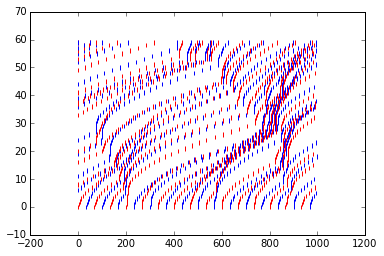

In [420]:
simulation = Simulation(num_cars = 30)
print(simulation.scatter(60))
print(simulation.report)

The above graph is a representation of a one way street over sixty seconds where the speed-limit is 120 kph. As you can see there are a few traffic jams which happen. As you can see a few break out because the speed-limit is incorrect and people are having to stop too quickly because they are approaching the cars in front too fast and having to slam on the breaks

In [422]:
for _ in range(100000):
    simulation = Simulation(num_cars = 30)
    new_max_speed = []
    simulation.run_simulation()
    new_max_speed.append(np.mean(np.array(simulation.speed_report))+ np.std(np.array(simulation.speed_report)))

In [423]:
new_max_speed

[20.478440676382633]

The above formula and resulting numbers are what the new speed limit should be in meters per second. If you take that and convert it, the new speed limit should be around 73 kph.

[154, 190, 218, 218, 240, 284, 308, 346, 416, 416, 502, 522, 548, 548, 644, 670, 670, 718, 718, 818, 828, 892, 892, 892, 978, 998, 0, 66, 108, 108]


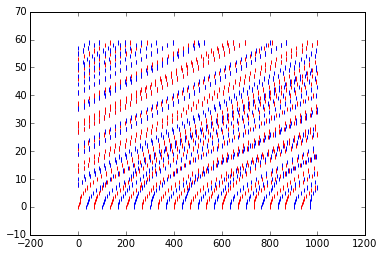

In [433]:
simulation = Simulation(num_cars = 30)
print(simulation.scatter(60))
print(simulation.report)

And her we see traffic when it's set at 73 kph. It still isn't perfect with some cars getting close to others, but it overall is running much smoother and traffic has no major hold-ups.